<a href="https://colab.research.google.com/github/claudiap91/Python/blob/main/TPFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP FINAL

**Ejercicio 1**\
Buscar un dataset (Que no sea los trabajados en clases)

**Ejercicio 2**\
Realizar una introduccion al dataset de que se trata,definir sus variables (Diccionario de datos)

**Ejercicio 3**\
Identificar el tipo de variable,decide justificando su respuesta.

**Ejercicio 4**\
Detectar Valores Ausente  y Valores Atipicos .Decidir si eliminarlos y el por que de la eleccion.

**Ejercicio 5**\
Realizar un analisis univariado y en base a esos graficos,sacar conclusiones.

**Ejercicio 6**\
Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas\


**Para los que entregan en blanco**

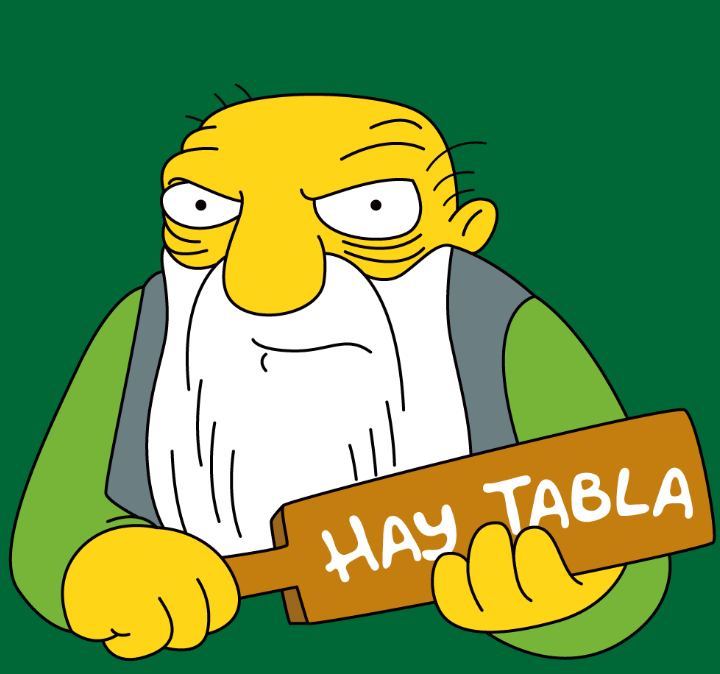

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url="/content/Tokyo2021.csv"
df=pd.read_csv(url)
df.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia


In [ ]:
df.shape

(93, 9)

**Ejercicio 2**\
Realizar una introduccion al dataset de que se trata,definir sus variables (Diccionario de datos)


El dataset trata de los juegos olimpicos en tokyo 2021 y tiene informacion de cuales paises participaron,en que continente,cuantas medallas de cada tipo recibieron y el total de medallas alcanzadas
sus variables son:
- rank(ranking)
- team(pais)
- gold medal(medallas de oro)
- silver medal(medallas de plata)
- bronze medal(medalla de bronce)
- total(total de medallas)
- rank by total(clasificacion total)
- noccode(nombre del pais en 3 caracteres)
- continent(continente)

**Ejercicio 3**\
Identificar el tipo de variable,decide justificando su respuesta.


- rank(ranking):variable cualitativa ordinal.Porque es una variable no metrica que tiene un orden de supremacia de acuerdo a un criterio jerarquico
- team(nombre del pais):variable cualitativa nominal.Porque es una variable no metrica que describe una caracteristica que no puedeser cuantificada
- gold medal(numero de medallas de oro):variable cuantitativa discreta.Porque es una variable que va a recibir un valor entero que se puede cuantificar
- silver medal(numero de medallas de plata):variable cuantitativa discreta.Porque es una variable que va a recibir un valor entero que se puede cuantificar
- bronze medal(numero de medalla de bronce):variable cuantitativa discreta.Porque es una variable que va a recibir un valor entero que se puede cuantificar
- total(numero total de medallas):variable cuantitativa discreta.Porque es una variable que va a recibir un valor entero que se puede cuantificar
- rank by total(clasificacion total):variable cualitativa ordinal.Porque es una variable no metrica que tiene un orden de supremacia de acuerdo a un criterio jerarquico
- noccode(nombre del pais en 3 caracteres):variavle cualitativa nominal.Porque no es metrica y describe una caracteristica.
- continent(continente):variable cualitativa nominal.Porque es una variable no metrica que describe una caracteristica que no puedeser cuantificada

**Ejercicio 4**\
Detectar Valores Ausente  y Valores Atipicos .Decidir si eliminarlos y el por que de la eleccion.

In [ ]:
df.isnull().sum()

Rank             0
Team/NOC         0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank by Total    0
NOCCode          0
Continent        0
dtype: int64

valores ausentes:no hay

In [ ]:
df.columns

Index(['Rank', 'Team/NOC', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
       'Total', 'Rank by Total', 'NOCCode', 'Continent'],
      dtype='object')

<Axes: >

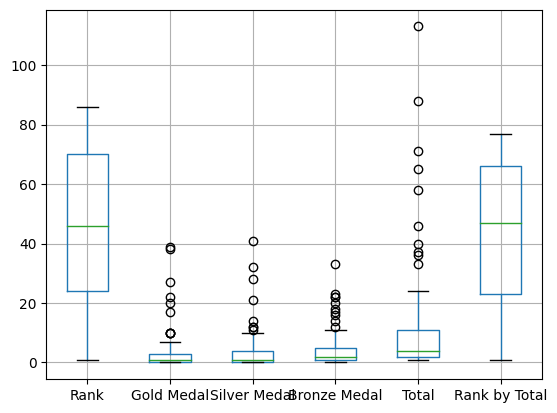

In [ ]:
df.boxplot()

In [ ]:
df[df["Gold Medal"]>0.5]
df[df["Gold Medal"]< 40]

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia
...,...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA,Africa
89,86,Grenada,0,0,1,1,77,GRN,North America
90,86,Kuwait,0,0,1,1,77,KUW,Africa
91,86,Republic of Moldova,0,0,1,1,77,MDA,Asia


In [ ]:
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
columns_to_check = ["Gold Medal","Silver Medal","Bronze Medal","Total"]
outliers_list = []
for col in columns_to_check:
    outliers = detect_outliers_iqr(df, col)
    outliers_list.append(outliers)

outliers_df = pd.concat(outliers_list)
print("Número de outliers detectados:", len(outliers_df))

Número de outliers detectados: 38


en este caso se detectan 38 de los que se llaman outliers o valores atipico porque en el caso de los juegos olimpicos son pocos los que consiguen medallas y muchas,creo que en este caso no deberian borrarse ya que esos valores son importantes

**Ejercicio 5**\
Realizar un analisis univariado y en base a esos graficos,sacar conclusiones.

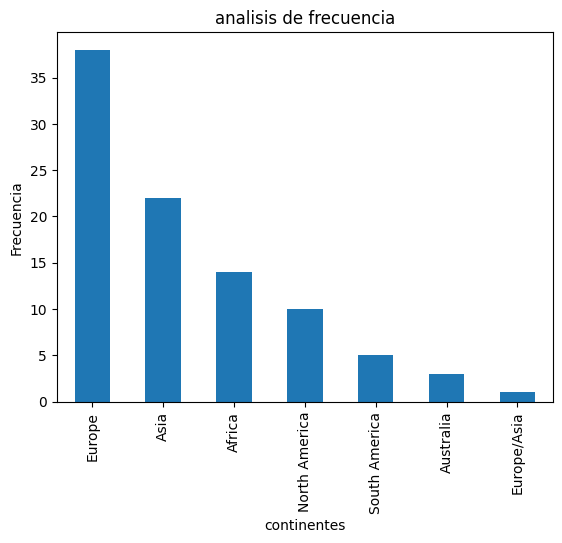

In [ ]:
# Análisis de frecuencias
df['Continent'].value_counts().plot(kind='bar')
plt.xlabel('continentes')
plt.ylabel('Frecuencia')
plt.title('Analisis de frecuencia segun los continentes')
plt.show()

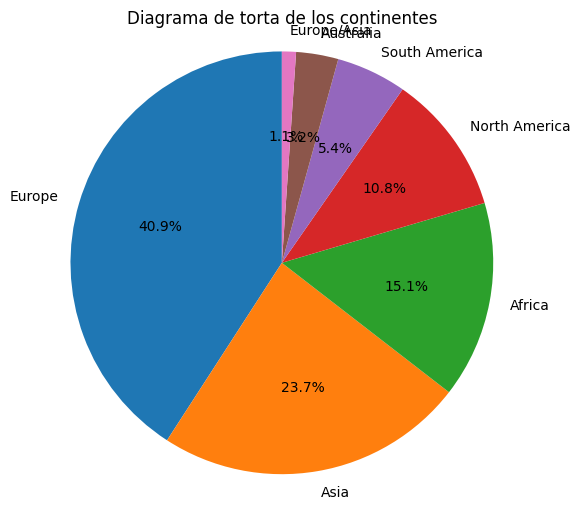

In [ ]:
#Diagrama de torta
labels = df['Continent'].value_counts().index
counts = df['Continent'].value_counts().values

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Diagrama de torta de los continentes')
plt.show()

Text(0, 0.5, 'cantidad de paises')

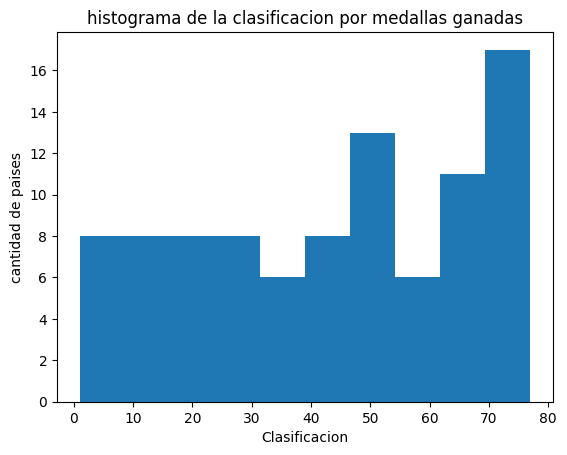

In [ ]:
plt.hist(df["Rank by Total"])
plt.title("histograma de la clasificacion por medallas ganadas")
plt.xlabel("Clasificacion")
plt.ylabel("cantidad de paises")

**Ejercicio 6**\
Realizar analisis de matriz corelacion y explicar que variable estan correlacionadas

<ipython-input-10-4d9cbd3f417f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Total', 'Rank by Total', 'NOCCode', 'Continent']].corr()


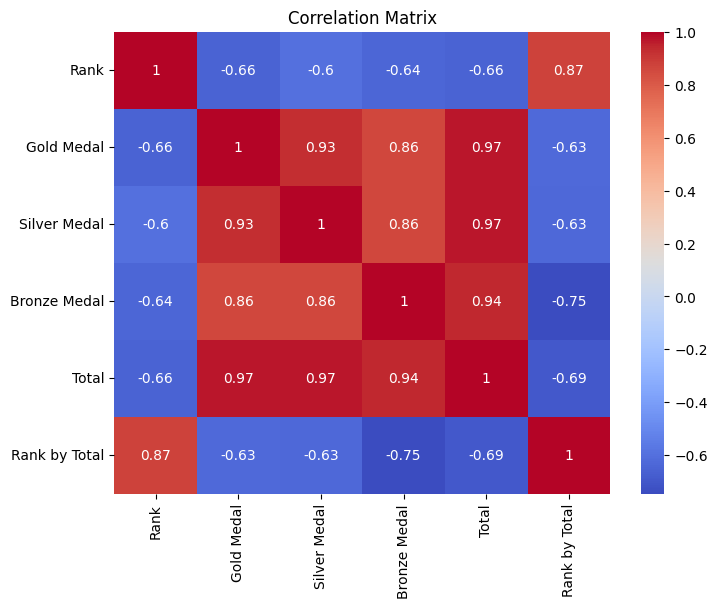

In [ ]:
import seaborn as snss
correlation_matrix = df[['Rank', 'Team/NOC', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
       'Total', 'Rank by Total', 'NOCCode', 'Continent']].corr()
plt.figure(figsize=(8, 6))
snss.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

las variables que estan correlacionados son:

- bronze medal con gold medal

- bronze medal con silver medal

- rank con rank by total

- gold medal con silver medal

- total con bronze medal

- total con gold medal

- total con silver medal